In [3]:
#Description : This program predicts if the price of a house will be above median proce or not using Deep Learning
#Import the dependency
from keras.models import Sequential #Initialize ANN
from keras.layers import Dense # Tell us no. layers, neurons per layer & activation function
from sklearn.model_selection import train_test_split # To split the data  into training and testing sets
from sklearn.preprocessing import MinMaxScaler # to  scale the data
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [4]:
#Import data 
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('housepricedata.csv') #Print first seven rows of data
df.head(7)

Saving housepricedata.csv to housepricedata (1).csv


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1


In [5]:
#Convert thedata into an array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
#Split the data set into independent and dependent data sets
X = dataset[:,0:10] #Get all the rows from columns [10,0)
Y = dataset[:,10] #Get all rows from columns at position 10  (11th column)

In [9]:
#Use the min max scalar method from preprocessing which scales the dataset so that all features lie between 0&1 inclusive
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
#Split the  data into 80% training and 20% testing(10%) and validating(10%)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size =0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1168, 10) (146, 10) (146, 10) (1168,) (146,)


In [0]:
#Build the model and architecture of deep neural network
model = Sequential() #initializes the ANN
model.add(Dense(units=32, activation= 'relu', input_dim= 10))
model.add(Dense(units=32, activation= 'relu'))
model.add(Dense(units=32, activation= 'relu'))
model.add(Dense(units=1, activation= 'sigmoid'))

In [0]:
#Loss functions measure hpw well the model did on training and then tries to imporve using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy']
             )

In [21]:
#Train the model 
hist= model.fit(
            X_train,Y_train,
            batch_size=32, epochs=100,
            validation_data = (X_val, Y_val)
            )

Train on 1168 samples, validate on 146 samples
Epoch 1/100
1168/1168 [==============================] - 0s 313us/step - loss: 0.6921 - accuracy: 0.5557 - val_loss: 0.6886 - val_accuracy: 0.6781
Epoch 2/100
1168/1168 [==============================] - 0s 40us/step - loss: 0.6875 - accuracy: 0.6533 - val_loss: 0.6859 - val_accuracy: 0.6781
Epoch 3/100
1168/1168 [==============================] - 0s 37us/step - loss: 0.6840 - accuracy: 0.6533 - val_loss: 0.6834 - val_accuracy: 0.6507
Epoch 4/100
1168/1168 [==============================] - 0s 39us/step - loss: 0.6806 - accuracy: 0.6455 - val_loss: 0.6806 - val_accuracy: 0.6918
Epoch 5/100
1168/1168 [==============================] - 0s 40us/step - loss: 0.6774 - accuracy: 0.6978 - val_loss: 0.6780 - val_accuracy: 0.6781
Epoch 6/100
1168/1168 [==============================] - 0s 45us/step - loss: 0.6741 - accuracy: 0.6815 - val_loss: 0.6752 - val_accuracy: 0.6986
Epoch 7/100
1168/1168 [==============================] - 0s 41us/step - loss

In [22]:
#Evaluate the model
model.evaluate(X_test, Y_test)[1]

146/146 [==============================] - 0s 40us/step


0.8972602486610413

In [25]:
#Make a prediction
prediction = model.predict(X_test)
prediction =[1 if y>=87 else 0 for y in prediction]
print(prediction)
print(Y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1]


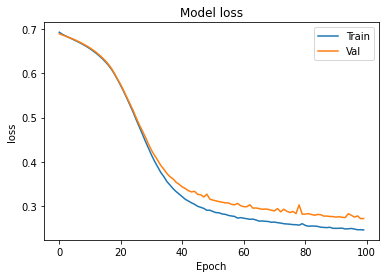

In [30]:
# Visualising the training loss and the validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')

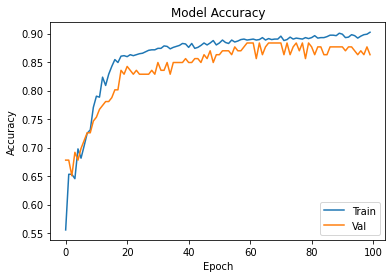

In [36]:
# Visualising the training accuracy and the validation accuracy to see if  the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')